In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
# from matplotlib import rc
# rc('text', usetex=True)
import numpy as np
from HurstIndexSolver import HurstIndexSolver
HSolver = HurstIndexSolver()

In [2]:
df = pd.read_csv("rsif20210272_si_002.csv")
df

,condition,participant,word,SL,dAlpha,tMF,lon10WF,PhonN,OrthN,RT,Unnamed: 10,legend,Unnamed: 12
0,HS,P1,1,34001,0.598716,316.969779,1.1461,0,0,5655,NaN,condition,experimental condition: HS (Human Speech) or T...
1,HS,P1,2,25001,1.468981,1239.391730,6.1766,9,11,1768,NaN,participant,participant identity: P1 to P20
2,HS,P1,3,45001,0.692538,1033.213826,0.0000,0,0,1389,NaN,word,word sequence: 1 to 2027
3,HS,P1,4,32001,0.740500,789.347416,3.0686,1,0,889,NaN,SL,sound length [samples]
4,HS,P1,5,22001,0.301601,216.347464,5.7712,14,9,659,NaN,dAlpha,multifractal spectrum width of word sound
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40515,HS,P9,2023,32001,0.853477,562.377046,4.2392,15,10,805,NaN,NaN,NaN
40516,HS,P9,2024,32001,0.527515,285.456789,4.0550,13,9,424,NaN,NaN,NaN
40517,HS,P9,2025,24001,0.651590,235.291998,4.5143,20,6,544,NaN,NaN,NaN
40518,HS,P9,2026,29020,0.688166,327.123977,5.0170,5,4,437,NaN,NaN,NaN


In [3]:
# np.save("test", df["RT"][df["participant"]=="P1"].values)

In [4]:
H_HS = [[] for i in range(10)]
H_TTS = [[] for i in range(10)]
h = [i for i in range(13)]
p = "P{:d}"
minimal = 10
max_scale = 200
# 1-11 for HS, 11-21 for TTS
for i in range(1, 21):
    # A results already saved in "TestRT.csv", regenerate will take much times
    break
    ts = df["RT"][df["participant"] == p.format(i)].values
    ts = ts[50:]
    h[0] = HSolver.EstHurstAbsoluteMoments(ts, minimal)
    h[1] = HSolver.EstHurstAggregateVariance(ts, minimal)
    h[2] = HSolver.EstHurstGHE(ts)
    h[3] = HSolver.EstHurstHiguchi(ts)
    h[4] = HSolver.EstHurstDFAnalysis(ts, minimal)
    h[5] = HSolver.EstHurstRSAnalysis(ts, minimal)
    h[6] = HSolver.EstHurstTTA(ts)
    h[7] = HSolver.EstHurstPeriodogram(ts, cutoff=0.3)
    h[8] = HSolver.EstHurstAWC(ts)
    h[9] = HSolver.EstHurstVVL(ts)
    h[10]= HSolver.EstHurstLocalWhittle(ts)
    h[11]= HSolver.EstHurstLSSD(ts, max_scale)
    h[12]= HSolver.EstHurstLSV(ts, max_scale)
    for j in h:
        if i < 11:
            H_HS[i - 1].append(j)
        else:
            H_TTS[i - 11].append(j)    
        print("{:.4f}".format(j), end=" ")
    print()

In [5]:
# pass if not regenate results
dic = {}
H = np.vstack([np.array(H_HS), np.array(H_TTS)])
methods = ['AM', 'AV', 'GHE', 'HM', 'DFA', 'RS', 'TTA', 'PM', 'AWC', 'VVL', 'LW', 'LSSD', 'LSV']
for i in range(len(methods)):
    dic[methods[i]] = H[:, i]
mydf = pd.DataFrame(dic)
mydf

IndexError: index 0 is out of bounds for axis 1 with size 0

In [6]:
# mydf.to_csv("TestRT.csv")
mydf = pd.read_csv("TestRT.csv", index_col=0)
H = mydf.values
methods = ['AM', 'AV', 'GHE', 'HM', 'DFA', 'RS', 'TTA', 'PM', 'AWC', 'VVL', 'LW', 'LSSD', 'LSV']

In [7]:
H1 = np.ravel(H.T)
dic1 = {"data": H1}
dic1["method"] = [methods[i] for i in [i // 20 for i in range(len(H1))]]
dic1["class"] = ["TimeDomain" for i in range(140)]
dic1["class"] += ["FrequencyDomain" for i in range(80)]
dic1["class"] += ["TimeDomain" for i in range(40)]
types = ["HS" for i in range(10)]
types += ["TTS" for i in range(10)]
dic1["type"] = []
for i in range(13):
    dic1["type"] += types
mydf1 = pd.DataFrame(dic1)
mydf1

,data,method,class,type
0,0.873998,AM,TimeDomain,HS
1,0.922529,AM,TimeDomain,HS
2,0.905088,AM,TimeDomain,HS
3,0.600741,AM,TimeDomain,HS
4,0.830218,AM,TimeDomain,HS
...,...,...,...,...
255,0.538743,LSV,TimeDomain,TTS
256,0.744635,LSV,TimeDomain,TTS
257,0.577744,LSV,TimeDomain,TTS
258,0.637192,LSV,TimeDomain,TTS


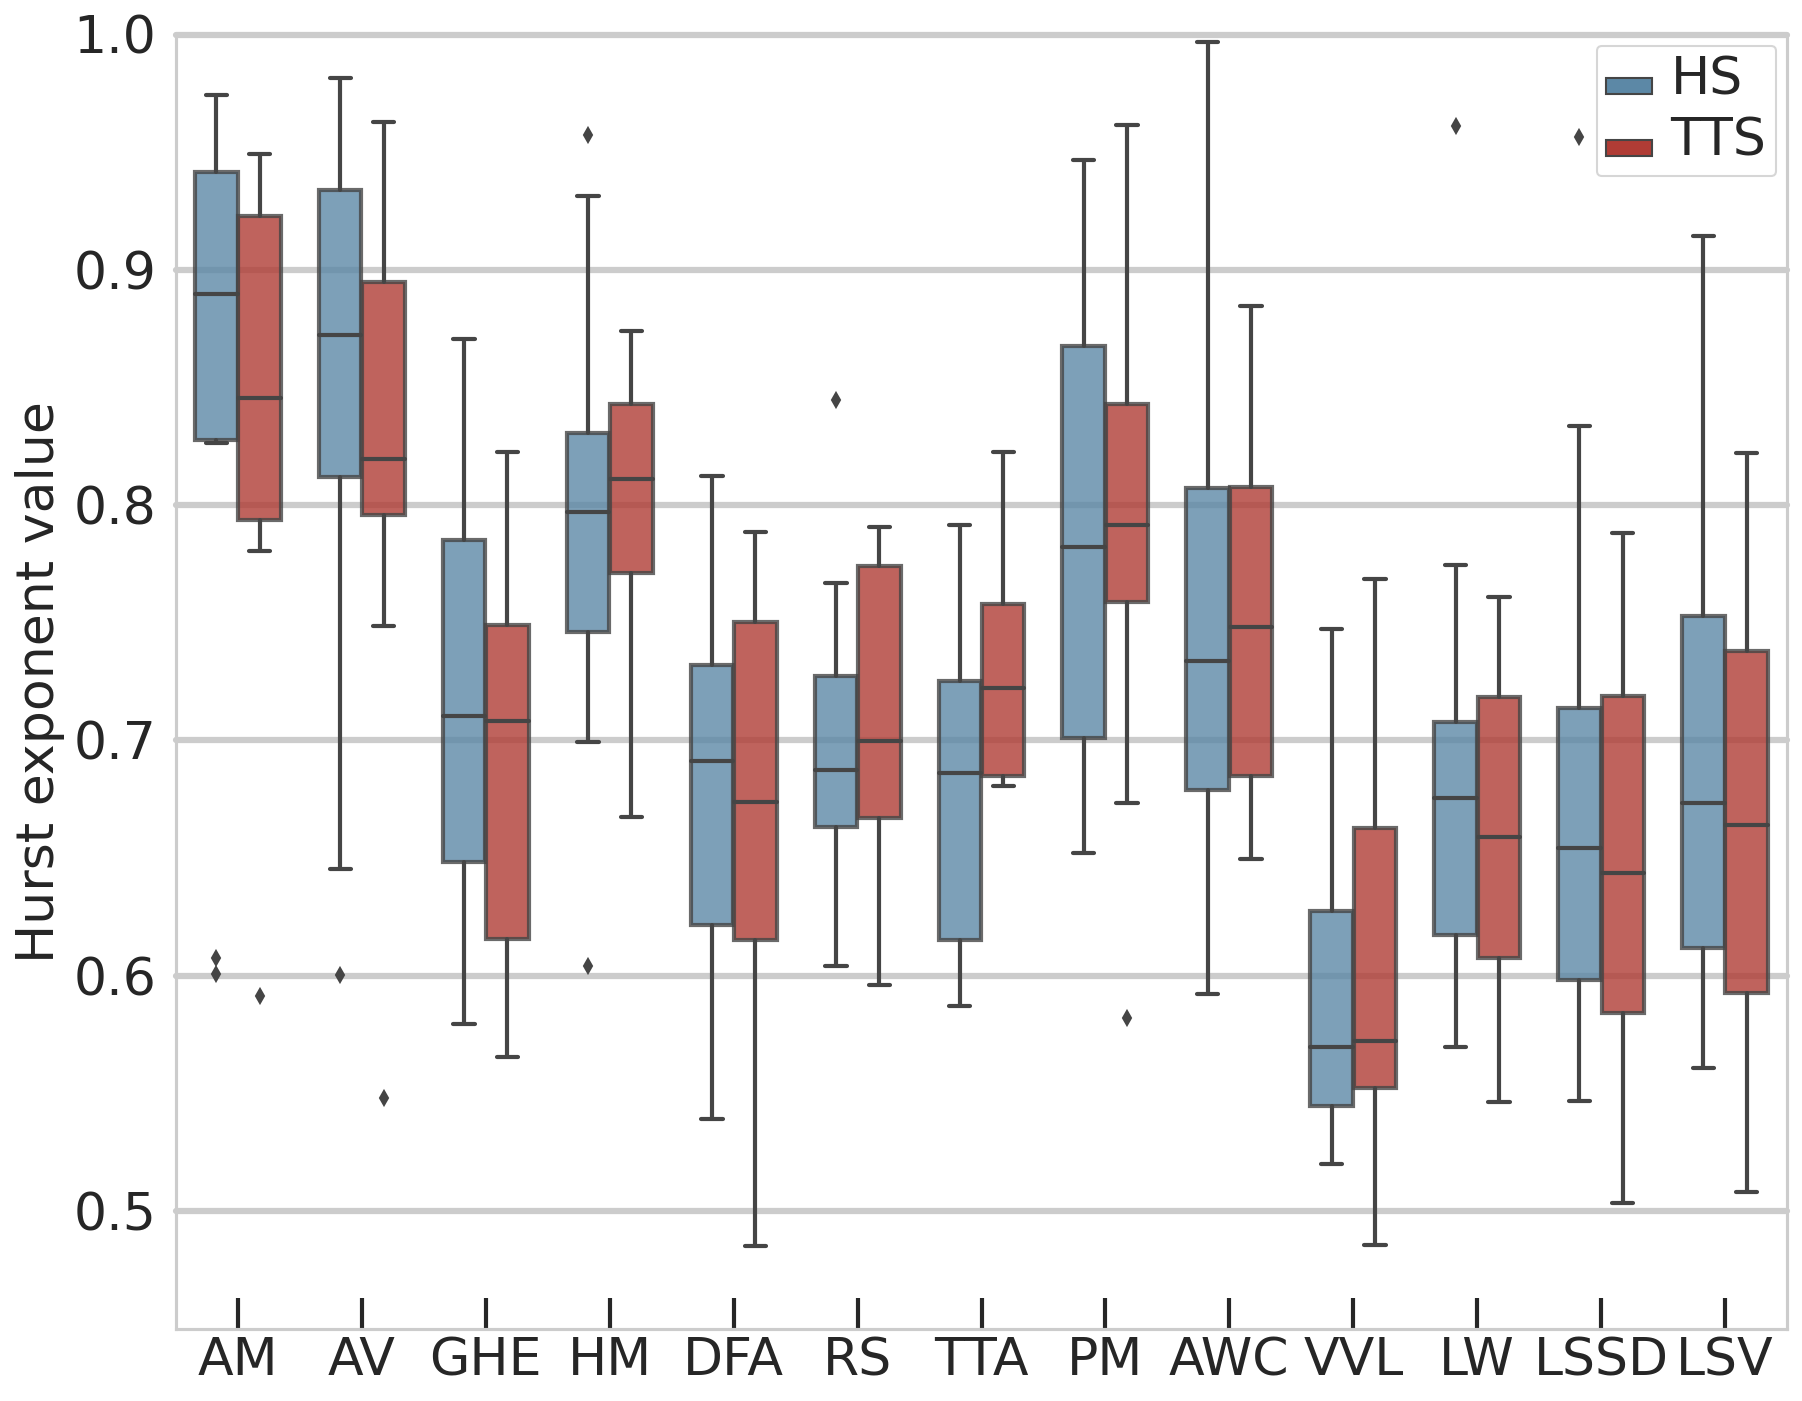

In [8]:
plt.figure(figsize=(12, 9.5), dpi=150)
sns.set(style='whitegrid', rc={
    "grid.linewidth": 3, 
    'xtick.bottom': True,
    'xtick.major.size': 15,
    'xtick.major.width': 2,
    'xtick.direction': 'in',
    'axes.linewidth': 1.5,
})
sns.despine(left=True, bottom=True) 
palette = ["#508AB2", "#C52A20", "#F0BB41", "#4CC9F0", "#F72585", "#7209B7", "#3A0CA3", "#4361EE"]
# create grouped boxplot 
ax = sns.boxplot(
    x = mydf1.method,
    y = mydf1.data,
    hue = mydf1.type,
    width = .7, linewidth = 2,
    palette = palette,
    boxprops=dict(alpha=1)
)

ax.set(xlabel="", ylim=(0.45, 1))
ax.tick_params(labelsize=25)
ax.yaxis.grid(True, clip_on=False)
ax.legend_.set_title(None)

# hatches = itertools.cycle(['/', '+'])
# for i, bar in enumerate(ax.patches):
#     hatch = next(hatches)
#     bar.set_hatch(hatch)
for bar in ax.patches:
    bar.set_alpha(0.8)

plt.tight_layout()
# plt.xlabel('Methods', fontsize=23)
plt.ylabel('Hurst exponent value', fontsize=25)
plt.setp(ax.get_legend().get_texts(), fontsize='25') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title
plt.show()
# plt.savefig("./pics/Est-RT.png", dpi=600)

# Results

In [10]:
df_fgn = pd.read_excel("TestFGN.xlsx")
df_fgn

,H,AM,AV,GHE,HM,DFA,RS,TTA,PM,AWC,VVL,LW,LSSD,LSV,RS-AL
0,0.30,0.3023,0.2984,0.3006,0.3006,0.3078,0.3692,0.3003,0.3099,0.2919,0.3126,0.2629,0.3002,0.3003,0.3329
1,0.35,0.3521,0.3495,0.3501,0.3500,0.3502,0.4056,0.3500,0.3614,0.3426,0.3592,0.3239,0.3496,0.3497,0.3707
2,0.40,0.4074,0.4044,0.3994,0.3999,0.3981,0.4468,0.3988,0.4047,0.3952,0.4085,0.3844,0.4001,0.3998,0.4134
3,0.45,0.4365,0.4353,0.4507,0.4511,0.4544,0.4856,0.4472,0.4369,0.4372,0.4402,0.4429,0.4503,0.4504,0.4544
4,0.50,0.5000,0.4956,0.4991,0.4991,0.4995,0.5293,0.4994,0.5037,0.4989,0.4993,0.4994,0.4983,0.4985,0.4999
5,0.55,0.5425,0.5397,0.5511,0.5512,0.5516,0.5702,0.5510,0.5561,0.5431,0.5430,0.5577,0.5521,0.5519,0.5433
6,0.60,0.5869,0.5849,0.5999,0.6001,0.5991,0.6102,0.6017,0.5851,0.5985,0.6005,0.6127,0.6000,0.6003,0.5858
7,0.65,0.6411,0.6394,0.6478,0.6474,0.6485,0.6539,0.6482,0.6524,0.6491,0.6432,0.6652,0.6492,0.6488,0.6317
8,0.70,0.6679,0.6648,0.6984,0.6988,0.7057,0.6853,0.6994,0.6824,0.6955,0.6964,0.7213,0.7002,0.7000,0.6658
9,0.75,0.7192,0.7169,0.7470,0.7472,0.7516,0.7226,0.7484,0.7459,0.7519,0.7447,0.7747,0.7496,0.7496,0.7055


In [11]:
df_fgn.DFA - df_fgn.H

0     0.0078
1     0.0002
2    -0.0019
3     0.0044
4    -0.0005
5     0.0016
6    -0.0009
7    -0.0015
8     0.0057
9     0.0016
10   -0.0022
dtype: float64

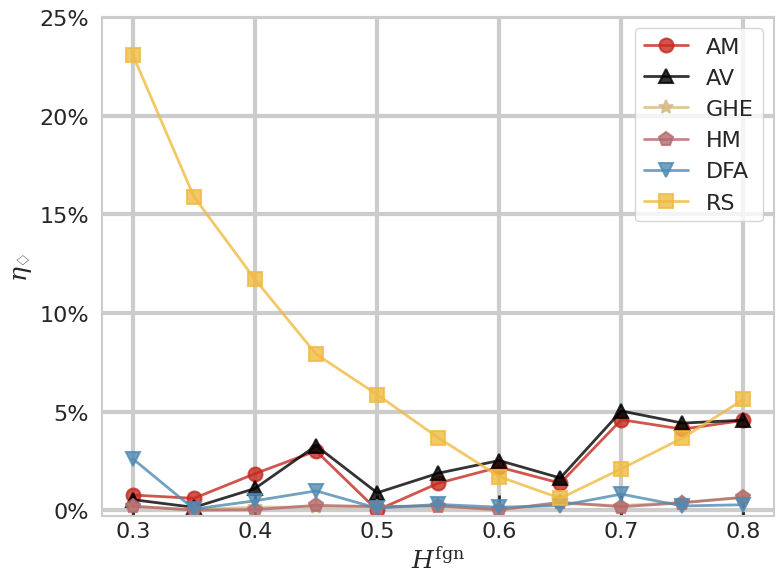

In [12]:
x = df_fgn.H
plt.figure(figsize=(8, 6), dpi=100)
# Set the font properties
font_props = {'fontweight': 'bold'}
plt.rc('font', size=12)  # controls default text sizes
plt.rc('xtick', labelsize=16)  # fontsize of the tick labels
plt.rc('ytick', labelsize=16)  # fontsize of the tick labels
plt.rcParams["mathtext.fontset"] = "dejavuserif"

markers = ["o", "^", "*", "p", "v", "s", "D"]
palette = ["#4CC9F0", "#F72585", "#7209B7", "#3A0CA3", "#4361EE"]
colors = ["#C52A20", "#000000", "#D5BA82", "#B36A6F", "#508AB2",  "#F0BB41",  "#508AB2","#A1D0C7"]
Time = ['AM', 'AV', 'GHE', 'HM', 'DFA', 'RS']
Freq = ['PM', 'AWC', 'VVL', 'LW']

M = Time
for i in range(len(M)):
    plt.plot(x, abs(df_fgn[M[i]] - x) / x, linewidth=2, alpha=0.8,
             marker=markers[i], markersize=10, markeredgewidth=1.5,
             # markerfacecolor='white',
             color=colors[i], label=M[i])
plt.ylim(-0.003, 0.25)
plt.xlabel(r"$H^{\rm fgn}$", fontsize=18)
plt.ylabel(r"$\eta_{\diamondsuit}$", fontsize=18)
plt.yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25], ["0%", "5%", "10%", "15%", "20%", "25%"])
plt.legend(fontsize=16)
# plt.grid()
plt.tight_layout()
plt.show()
# plt.savefig("./pics/Error-TimeDomain.png", dpi=600)

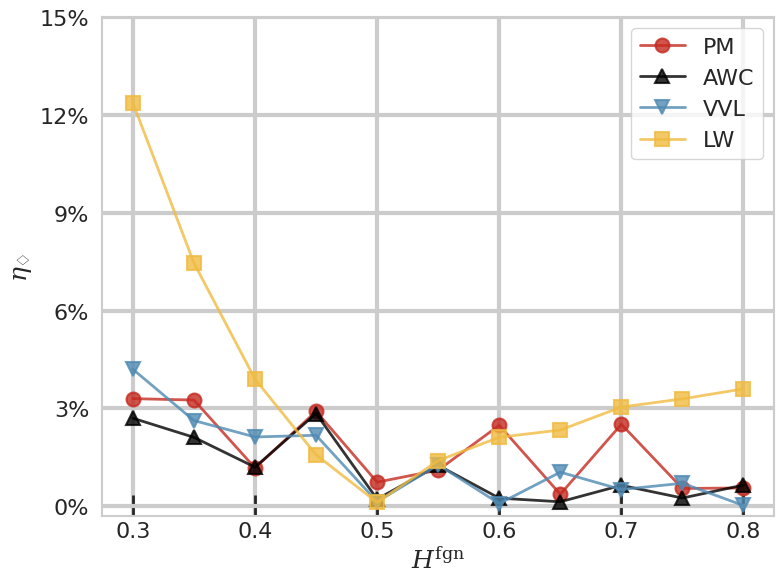

In [13]:
M = Freq

markers = ["o", "^", "v", "s", "v"]
colors = ["#C52A20", "#000000", "#508AB2",  "#F0BB41"]

plt.figure(figsize=(8, 6), dpi=100)
for i in range(len(M)):
    plt.plot(x, abs(df_fgn[M[i]] - x) / x, linewidth=2, alpha=0.8,
             marker=markers[i], markersize=10, markeredgewidth=1.5,
             # markerfacecolor='white',
             color=colors[i], label=M[i])
plt.ylim(-0.003, 0.15)
plt.xlabel(r"$H^{\rm fgn}$", fontsize=18)
plt.ylabel(r"$\eta_{\diamondsuit}$", fontsize=18)
plt.yticks([0, 0.03, 0.06, 0.09, 0.12, 0.15], ["0%", "3%", "6%", "9%", "12%", "15%"])
plt.legend(fontsize=16)
# plt.grid()
plt.tight_layout()
plt.show()
# plt.savefig("./pics/Error-FreqDomain.png", dpi=600)

# Comparison of L1-Norm and L2-Nrom

In [15]:
n = 30
H = 0.8
h = [np.zeros([2, n]) for i in range(10)]
datas = pd.read_csv("./data/FGN_{:.2f}_30.csv".format(H)).values
minimal = 50
max_scale = 100
methods = ['AM', 'AV', 'GHE', 'HM', 'DFA', 'RS', 'TTA', 'PM', 'AWC', 'VVL']
for j in range(10):
    print("{:6s}".format(methods[j]), end=" ")
print()
for i in range(n):
    # A results already saved in "TestNorm*.csv", regenerate will take much times
    break
    ts = datas[:30000, i]
    method = ['L1', 'L2']
    for j in range(2):
        h[0][j, i] = HSolver.EstHurstAbsoluteMoments(ts, minimal, method=method[j])
        h[1][j, i] = HSolver.EstHurstAggregateVariance(ts, minimal, method=method[j])
        h[2][j, i] = HSolver.EstHurstGHE(ts, method=method[j])
        h[3][j, i] = HSolver.EstHurstHiguchi(ts, method=method[j])
        h[4][j, i] = HSolver.EstHurstDFAnalysis(ts, minimal, method=method[j])
        h[5][j, i] = HSolver.EstHurstRSAnalysis(ts, minimal, method=method[j], IsRandom=False)
        h[6][j, i] = HSolver.EstHurstTTA(ts, max_scale=max_scale, method=method[j])
        h[7][j, i] = HSolver.EstHurstPeriodogram(ts, cutoff=0.3, method=method[j])
        h[8][j, i] = HSolver.EstHurstAWC(ts, method=method[j])
        h[9][j, i] = HSolver.EstHurstVVL(ts, method=method[j])
print(H, h[0].shape)

AM     AV     GHE    HM     DFA    RS     TTA    PM     AWC    VVL    
0.8 (2, 30)


In [16]:
# pass if not regenate results
dic = {"methods": methods + methods, "estimation": [], "norm": []}
for i in range(10):
    dic["estimation"].append(np.mean(h[i][0, :]))
    dic["norm"].append("L1-Norm")
for i in range(10):
    dic["estimation"].append(np.mean(h[i][1, :]))
    dic["norm"].append("L2-Norm")
df = pd.DataFrame(dic)
df["error"] = abs(df.estimation - H) / H
# df.to_csv("./TestNorm_H_{:.2f}.csv".format(H))
df

,methods,estimation,norm,error
0,AM,0.0,L1-Norm,1.0
1,AV,0.0,L1-Norm,1.0
2,GHE,0.0,L1-Norm,1.0
3,HM,0.0,L1-Norm,1.0
4,DFA,0.0,L1-Norm,1.0
5,RS,0.0,L1-Norm,1.0
6,TTA,0.0,L1-Norm,1.0
7,PM,0.0,L1-Norm,1.0
8,AWC,0.0,L1-Norm,1.0
9,VVL,0.0,L1-Norm,1.0


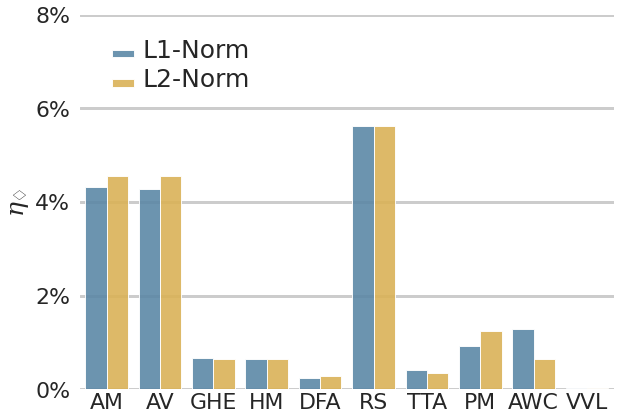

In [20]:
H = 0.8
df = pd.read_csv("TestNorm_H_{:.2f}.csv".format(H))

sns.set(rc={'figure.figsize':(12, 9.5)})

sns.set(style='whitegrid', rc={
    "grid.linewidth": 3, 
    'xtick.bottom': False,
    'xtick.major.size': 15,
    'xtick.major.width': 2,
    'xtick.direction': 'in',
    'axes.linewidth': 1.5,
})

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="methods", y="error", hue="norm",
    palette=["#508AB2",  "#F0BB41"],
    alpha=.9, 
    height=6,
    aspect=12/9.5
)
sns.despine(left=True, bottom=True) 
g.legend.set_title("")
g.tick_params(labelsize=22)

plt.ylabel(f"$\eta_\diamondsuit$", fontsize=25)

if H != 0.3:
    sns.move_legend(g, "upper left", bbox_to_anchor=(.17, .92))
    g.set(xlabel="", ylim=(0.0, 0.08))
    plt.yticks([0.00, 0.02, 0.04, 0.06, 0.08], ["0%", "2%", "4%", "6%", "8%"])
    # plt.yticks([0.00, 0.02, 0.04, 0.06, 0.08, 0.10], ["0%", "2%", "4%", "6%", "8%", "10%"])
else:
    # sns.move_legend(g, "upper left", bbox_to_anchor=(.17, .83))
    sns.move_legend(g, "upper left", bbox_to_anchor=(.17, .95))
    g.set(xlabel="", ylim=(0.0, 0.25))
    plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25], ["0%", "5%", "10%", "15%", "20%", "25%"])
    # plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30], ["0%", "5%", "10%", "15%", "20%", "25%", "30%"])

plt.setp(g.legend.get_texts(), fontsize='25') # for legend text
plt.tight_layout()
plt.show()
# plt.savefig("./pics/ErrorNorm30000_H_{:.2f}.png".format(H), dpi=600)